In [55]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()

In [56]:

print("Keys of fetch_olivetti_faces: \n{}".format(dataset.keys()))
print(dataset.data.shape)
print(len(dataset.data[1]))
print(dataset.data[61])
print(dataset['DESCR'][:1000] + "\n...")
print("Type of data: {}".format(type(dataset['data']))+"\n")
print("First six columns of data:\n{}".format(dataset['data'][:6]))

dataset.target


Keys of fetch_olivetti_faces: 
dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)
4096
[0.30578512 0.30578512 0.5495868  ... 0.2231405  0.24380165 0.2231405 ]
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous backg

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [58]:
pwd 

'/content'

In [59]:
data=np.load("/content/drive/MyDrive/Face-recognation-Using-Random-forest-master/Face-recognation-Using-Random-forest-master/olivetti_faces.npy")  #https://www.kaggle.com/serkanpeldek/face-recognition-on-olivetti-dataset/data
target=np.load("/content/drive/MyDrive/Face-recognation-Using-Random-forest-master/Face-recognation-Using-Random-forest-master/olivetti_faces_target.npy")
X= data
y=target


In [60]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))


There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [61]:
np.random.seed(21)
idx_rand = np.random.randint(len(data), size=8)


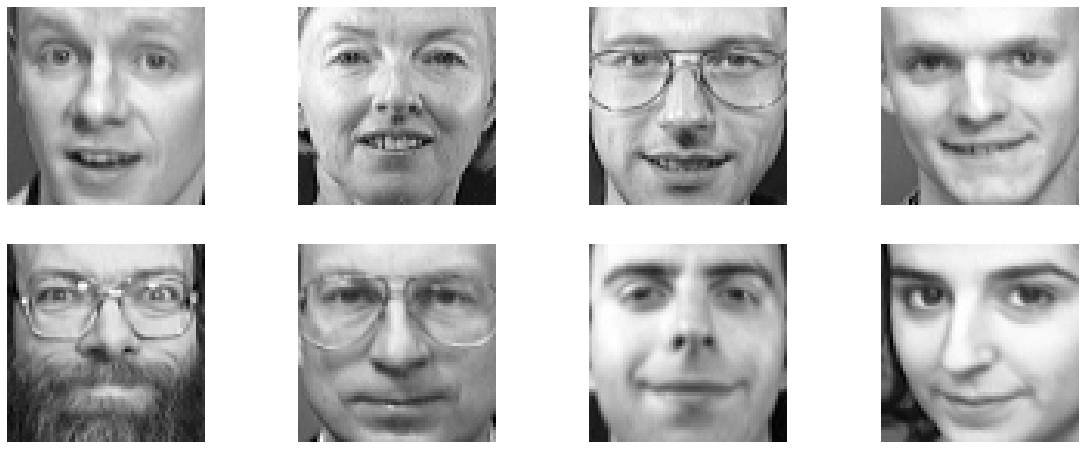

In [62]:
%matplotlib inline
plt.figure(figsize=(20, 8))
for p, i in enumerate(idx_rand):
    plt.subplot(2, 4, p + 1)
    plt.imshow(data[i, :].reshape((64, 64)), cmap='gray')
    plt.axis('off')


In [63]:
print("unique target number:",np.unique(target)) #our images labled from 0 :39

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [64]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")


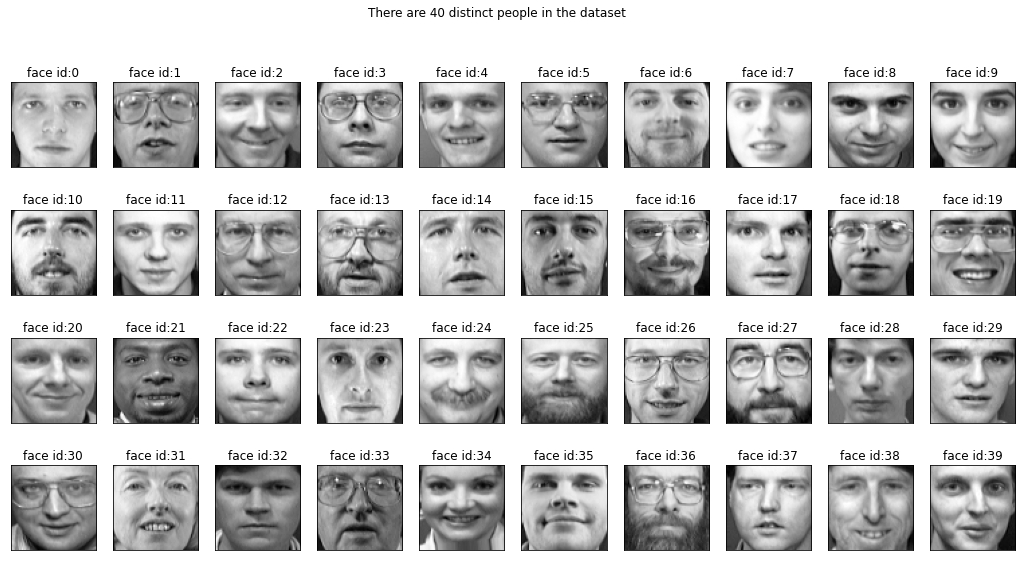

In [65]:
show_40_distinct_people(data, np.unique(target))

In [66]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

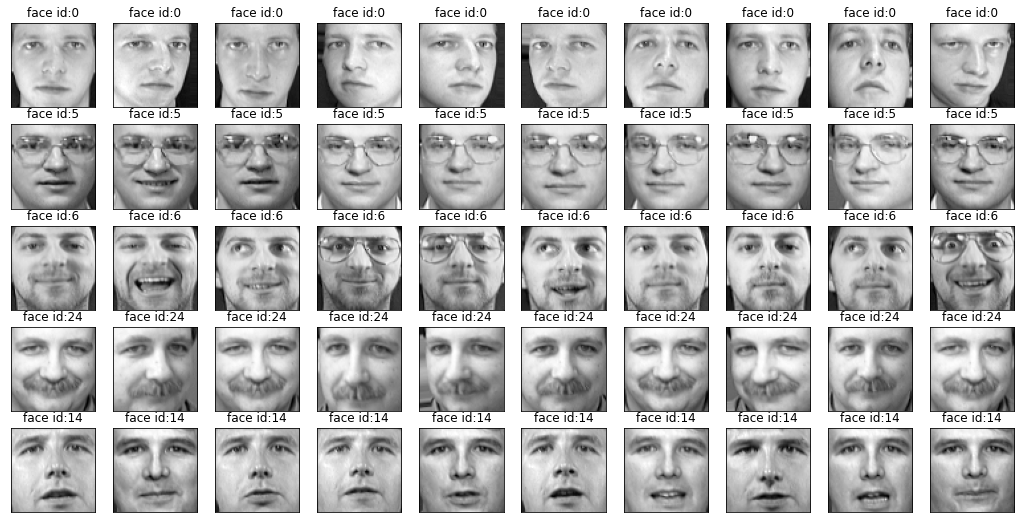

In [67]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 6, 24, 14])

In [68]:
#We reshape images for machine learnig  model before send it to calssifiar 
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)
X[0]


X shape: (400, 4096)


array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [69]:
from sklearn.model_selection import train_test_split  #split our data
#from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
    

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=21,test_size=0.2
    #this is the hyper paramter
)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (320, 4096)
y_train shape:(320,)


In [71]:
clf=RandomForestClassifier(n_estimators=100 , random_state=21)
#create 100 descision tree and take the majority voting of them
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(X_test[2]) 
print(y_pred[2]) 

[0.30578512 0.30578512 0.5495868  ... 0.2231405  0.24380165 0.2231405 ]
6


In [72]:
y_hat = clf.predict(X_test)
y_pred = clf.predict(X_test) 
print("Test set predictions:\n {}".format(y_pred))

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))


Test set predictions:
 [10  0  6 22  3 24 31  5 34 23 31  7 20 31 32 13 37  1 26 16 17 14 11  5
 34  8 21 39  4 17 14  4  8  2 13 18 11  9 37 15 24  1  7  5 19  7 10 26
 33 37 29 21 13 17 34 38 32  6 13 16 20 36 38  5 28  4 24 17 18 30 14  9
 22 39 28  4 35 35 18 36]
Test set score: 0.94


In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)


0.9375

In [74]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

In [75]:
rfc=RandomForestClassifier()
svm=SVC()

In [76]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
result1=rfc.predict(X_test) 

In [79]:
result4=svm.predict(X_test)

In [80]:
result1=rfc.predict(X_test)     
from sklearn.metrics import accuracy_score
accuracy_score(y_test,result1)

0.95

In [81]:
result3=svm.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,result3)

0.9625

In [82]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=21, max_depth=25)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.5625

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)


0.9375

[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


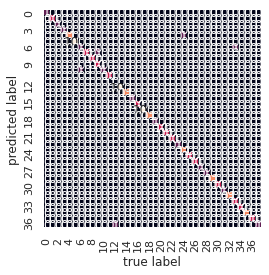

In [87]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='b', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(mat)

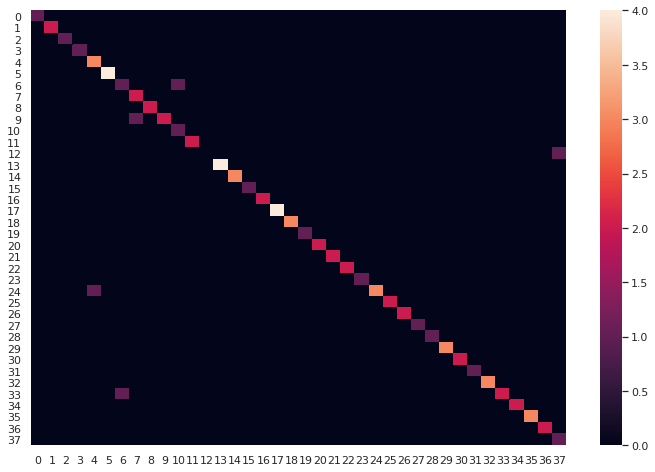

In [88]:
import seaborn as sns
import sklearn.metrics as metrics
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [89]:
from sklearn.model_selection import cross_val_score
#mglearn.plots.plot_cross_validation()

scores = cross_val_score(clf, X, y)
print("Cross-validation scores: {}".format(scores))


Cross-validation scores: [0.9875 0.9375 0.95   0.9375 0.9125]
